Air Pollution Metric done by Mason Kaing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import fpsnippets

df = pd.read_csv('AQEData.csv')

location_pollution = df.groupby(['lat', 'lon'])['tons_per_yr'].sum().reset_index()

# Use fp snippets to change coordinates to neighborhoods
location_pollution['neighborhood'] = location_pollution.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)

# group the neighborhood we got and the tons per year together
neighborhood_avg_pollution = location_pollution.groupby('neighborhood')['tons_per_yr'].mean().reset_index()

df['neighborhood'] = df.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)

#count the number of reports for each neighborhood
report_counts = df.groupby('neighborhood').size().reset_index(name='num_reports')

# merge the data together
neighborhood_stats = neighborhood_avg_pollution.merge(report_counts, on='neighborhood')
neighborhood_stats.columns = ['neighborhood', 'avg_tons_per_yr', 'num_reports']

# Filter for neighborhoods with at least 50 reports. This is due to a bunch of neighborhoods having around 10 reports making their avg very low.
neighborhood_stats_filtered = neighborhood_stats[neighborhood_stats['num_reports'] >= 50]

# Sort data to be printed
neighborhood_stats_sorted = neighborhood_stats_filtered.sort_values(by='avg_tons_per_yr', ascending=True)

# print out
print("Neighborhoods with the lowest average air pollution:")
print(neighborhood_stats_sorted.head(20))

Neighborhoods with the lowest average air pollution:
                 neighborhood  avg_tons_per_yr  num_reports
20         Point Breeze North       118.430000          130
27        Upper Lawrenceville       188.677800          171
15                    Larimer       534.410000          160
23           South Side Flats      1294.155000           66
17        Lower Lawrenceville      1451.656545          162
16   Lincoln-Lemington-Belmar      7444.010000           99
3                   Brookline      9437.223400          233
2                       Bluff     12648.700400          397
1                  Bloomfield     15923.230000           66
6   Central Business District     57403.033343          336
25            Terrace Village     65515.640250          156
18         Marshall-Shadeland     97911.136031          777
22              South Oakland    104945.493224          558
13                       Hays    112675.487796          225
7       Central Lawrenceville    122682.841962 

We are showing the top 5 in this bar graph since if it was higher the numbers for the avg air pollution go to high. It won't show the top placements as well

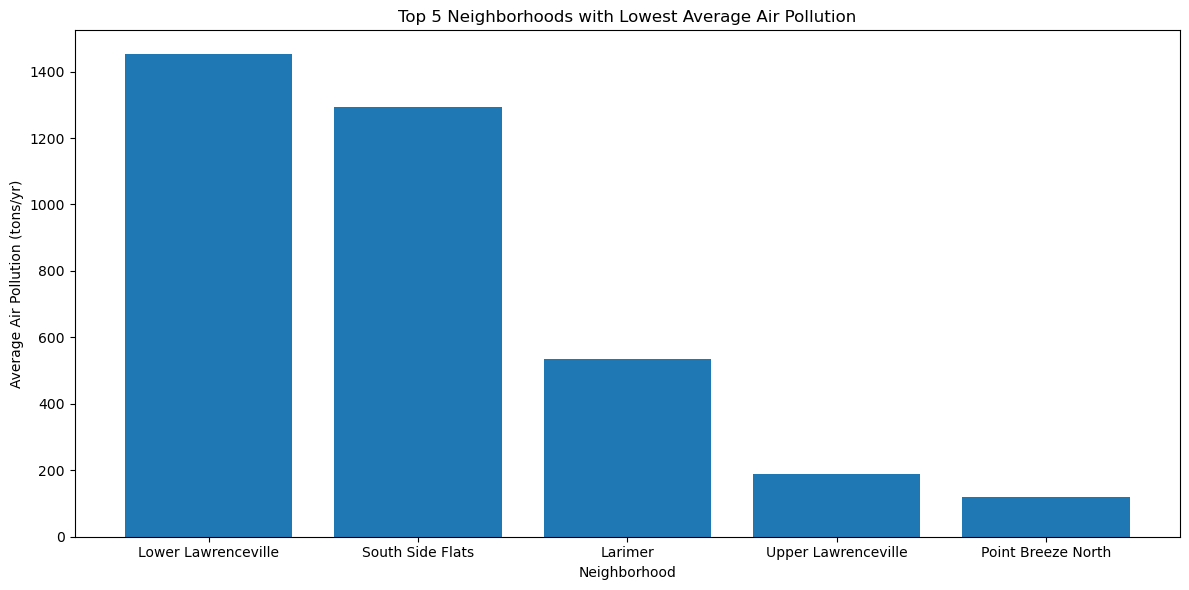

In [10]:
top_5_lowest = neighborhood_stats_sorted.head(5)
plt.figure(figsize=(12, 6))
plt.bar(
    top_5_lowest['neighborhood'].iloc[::-1],
    top_5_lowest['avg_tons_per_yr'].iloc[::-1]
)
plt.xlabel('Neighborhood')
plt.ylabel('Average Air Pollution (tons/yr)')
plt.title('Top 5 Neighborhoods with Lowest Average Air Pollution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Conclusion:

Point Breeze North is the best neighborhood for air quality (low average air pollution). There is no good placement for Point Breeze North on the other metrics so try looking at Lawrenceville now due to Upper Lo